In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregando o dataset de segmentação de clientes do shopping
df = pd.read_csv('Mall_Customers.csv')

# Exibindo as primeiras 5 linhas do dataset para análise
print("Primeiras 5 linhas do dataset real:")
print(df.head())

Primeiras 5 linhas do dataset real:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
# Focando nas colunas de interesse para o agrupamento
# 'Annual Income (k$)' (Renda Anual) e 'Spending Score (1-100)' (Pontuação de Gastos)
# Estas duas colunas são ideais para segmentação de clientes.
X = df.iloc[:, [3, 4]].values

# Normalizando os dados para que o K-Means não seja afetado pela escala
# StandardScaler padroniza os dados para média 0 e desvio padrão 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nDados prontos para o agrupamento!")


Dados prontos para o agrupamento!


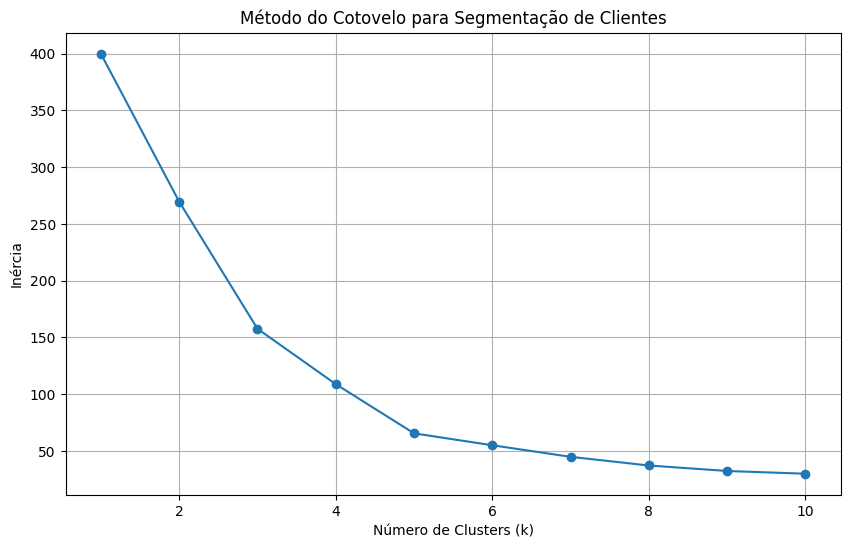

In [3]:
# Método do Cotovelo para encontrar o número ideal de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Segmentação de Clientes')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

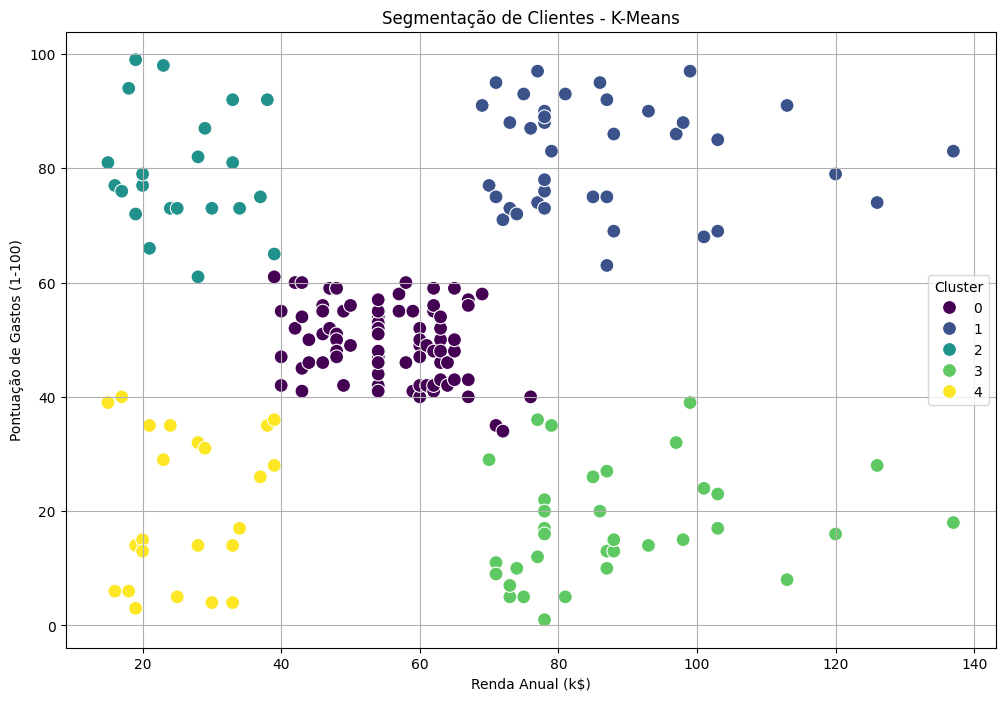


DataFrame com os clusters adicionados:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


In [4]:
# Aplicando K-Means com o número ideal de clusters (neste caso, 5 clusters)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adicionando a coluna de cluster ao DataFrame original
df['Cluster'] = y_kmeans

# Visualizando os clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Segmentação de Clientes - K-Means')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Pontuação de Gastos (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Exibindo o DataFrame com os clusters
print("\nDataFrame com os clusters adicionados:")
print(df.head())